In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from os import listdir
from os.path import isfile, join
import os
import cv2
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

In [1]:
from imblearn.over_sampling import SMOTE

In [3]:
mypath = "C:/Users/User/Desktop/CUNY/Faces_img/cropped.tar/cropped/crop_part1"


In [4]:
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

In [5]:
from tqdm import tqdm
images = []
age = []
gender = []
race = []
for index, row in tqdm(filedfnona.iterrows(), total=20000):
    img = np.array(cv2.imread(mypath+'/'+row[3]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).ravel()
    images.append(img)
    age.append([row[0]])
    gender.append([row[1]])
    race.append([row[2]])

 49%|████▉     | 9778/20000 [00:20<00:21, 486.61it/s]


In [6]:
filedfnona.head()

,age,gender,race,file
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg


In [7]:
filedfnona['age'].count()

9778

In [8]:
filedfnona['age'].describe()

count    9778.000000
mean       29.415116
std        24.775750
min         1.000000
25%         7.000000
50%        25.000000
75%        49.000000
max       110.000000
Name: age, dtype: float64

In [9]:
filedfnona['age'].value_counts()

1      1112
2       475
3       284
26      279
4       260
       ... 
110       2
99        2
100       2
91        1
101       1
Name: age, Length: 99, dtype: int64

(array([3149., 1393., 1532.,  945.,  962.,  851.,  483.,  348.,  110.,
           5.]),
 array([  1. ,  11.9,  22.8,  33.7,  44.6,  55.5,  66.4,  77.3,  88.2,
         99.1, 110. ]),
 <BarContainer object of 10 artists>)

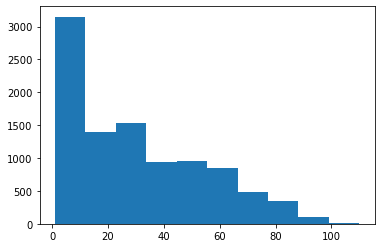

In [10]:
plt.hist(filedfnona['age'], bins=10)

(array([5265.,    0.,  405.,    0.,    0., 1553.,    0., 1452.,    0.,
        1103.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

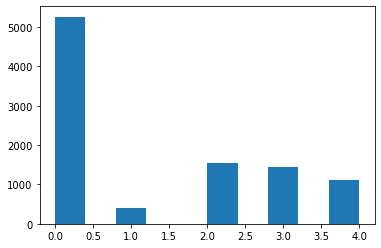

In [11]:
plt.hist(filedfnona['race'])

(array([4372.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

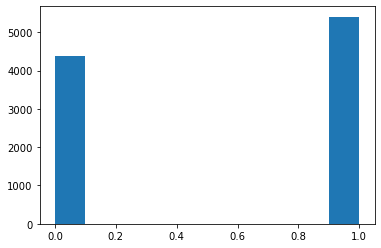

In [12]:
plt.hist(filedfnona['gender'])

In [13]:
balanced = filedfnona
balanced.head()

,age,gender,race,file
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg


In [ ]:
#1 infancy (0-2)
#2 Early Childhood (Ages 3-5)
#3 Middle Childhood (Ages 6-8)
#4 Late Childhood (Ages 9-11)
#5 Adolescence (Ages 12-20)
#6 Early Adulthood (Ages 21-35)
#7 Midlife (Ages 36-50)
#8 Mature Adulthood (Ages 51-79)
#9 Late Adulthood (Age 80+)

In [22]:
#balanced['age']=np.where((balanced.age==2), 1, balanced.age)
#balanced['age']=np.where(((balanced.age>=3) & (balanced.age<6)), 2, balanced.age)
#balanced['age']=np.where(((balanced.age>=6) & (balanced.age<9)), 3, balanced.age)
#balanced['age']=np.where(((balanced.age>=9) & (balanced.age<12)), 4, balanced.age)
#balanced['age']=np.where(((balanced.age>=12) & (balanced.age<21)), 5, balanced.age)
#balanced['age']=np.where(((balanced.age>=21) & (balanced.age<36)), 6, balanced.age)
#balanced['age']=np.where(((balanced.age>=36) & (balanced.age<51)), 7, balanced.age)
#balanced['age']=np.where(((balanced.age>=51) & (balanced.age<80)), 8, balanced.age)
#balanced['age']=np.where((balanced.age>=80), 9, balanced.age)

In [23]:
balanced['age'].value_counts()

6    2015
8    1866
1    1587
7    1213
5    1118
2     724
3     476
9     417
4     362
Name: age, dtype: int64

In [73]:
balanced['race'].value_counts()

0    5265
2    1553
3    1452
4    1103
1     405
Name: race, dtype: int64

In [74]:
balanced['gender'].value_counts()

1    5406
0    4372
Name: gender, dtype: int64

(array([1587.,  724.,  476.,  362.,    0., 1118., 2015., 1213., 1866.,
         417.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

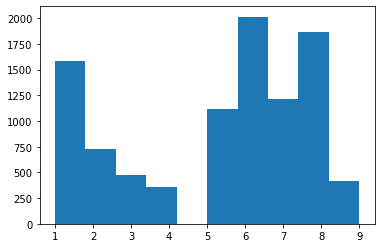

In [24]:
plt.hist(balanced['age'], bins=10)

In [77]:
age_bal = []
for index, row in tqdm(balanced.iterrows(), total=20000):
    age.append([row[0]])
    

 49%|████▉     | 9778/20000 [00:00<00:00, 20527.10it/s]


In [25]:
df = balanced[['age', 'gender', 'race']]

In [56]:
df4 = balanced.values

In [61]:
X3, y3 = df4[:, 1:4], df1[:,0]

In [62]:
y3 = LabelEncoder().fit_transform(y3)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))


Class=8, n=417 (4.265%)
Class=3, n=362 (3.702%)
Class=4, n=1118 (11.434%)
Class=0, n=1587 (16.230%)
Class=5, n=2015 (20.607%)
Class=6, n=1213 (12.405%)
Class=1, n=724 (7.404%)
Class=7, n=1866 (19.084%)
Class=2, n=476 (4.868%)


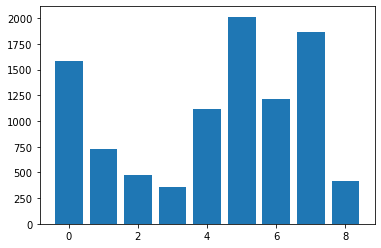

In [63]:
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [68]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [69]:
# transform the dataset
oversample = RandomOverSampler()
X3, y3 = oversample.fit_resample(X3, y3)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=8, n=2015 (11.111%)
Class=3, n=2015 (11.111%)
Class=4, n=2015 (11.111%)
Class=0, n=2015 (11.111%)
Class=5, n=2015 (11.111%)
Class=6, n=2015 (11.111%)
Class=1, n=2015 (11.111%)
Class=7, n=2015 (11.111%)
Class=2, n=2015 (11.111%)


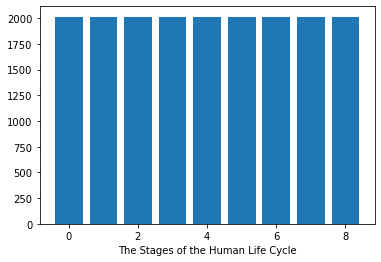

In [70]:
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('The Stages of the Human Life Cycle')
plt.show()

In [72]:
X3.shape

(18135, 3)

In [76]:
y3.shape

(18135,)

In [79]:
age_b_array = np.column_stack( (X3, y3) )

In [80]:
age_b_array

array([[1, 0, '100_1_0_20170110183726390.jpg.chip.jpg', 8],
       [1, 2, '100_1_2_20170105174847679.jpg.chip.jpg', 8],
       [1, 2, '101_1_2_20170105174739309.jpg.chip.jpg', 8],
       ...,
       [1, 0, '85_1_0_20170110183752111.jpg.chip.jpg', 8],
       [0, 0, '80_0_0_20170110183557670.jpg.chip.jpg', 8],
       [0, 2, '80_0_2_20170111205702505.jpg.chip.jpg', 8]], dtype=object)

In [84]:
#gender
Xr, yr = age_b_array[:, 1:4], age_b_array[:,0]

In [85]:
yr = LabelEncoder().fit_transform(yr)
# summarize distribution
counter = Counter(yr)
for k,v in counter.items():
    per = v / len(yr) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))


Class=1, n=10102 (55.704%)
Class=0, n=8033 (44.296%)


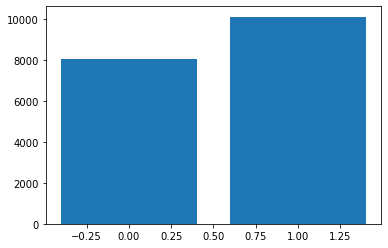

In [86]:
#imbalanced gender
plt.bar(counter.keys(), counter.values())
plt.show()

In [87]:
# transform the dataset
oversample = RandomOverSampler()
Xr, yr = oversample.fit_resample(Xr, yr)
# summarize distribution
counter = Counter(yr)
for k,v in counter.items():
    per = v / len(yr) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=10102 (50.000%)
Class=0, n=10102 (50.000%)


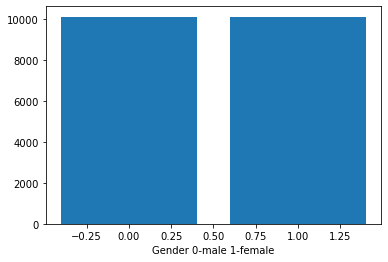

In [88]:
# plot the distribution balanced gender
plt.bar(counter.keys(), counter.values())
plt.xlabel('Gender 0-male 1-female')
plt.show()

In [90]:
Xr.shape

(20204, 3)

In [91]:
gender_b_array = np.column_stack( (Xr, yr) )

In [92]:
gender_b_array

array([[0, '100_1_0_20170110183726390.jpg.chip.jpg', 8, 1],
       [2, '100_1_2_20170105174847679.jpg.chip.jpg', 8, 1],
       [2, '101_1_2_20170105174739309.jpg.chip.jpg', 8, 1],
       ...,
       [0, '8_0_0_20170110220011635.jpg.chip.jpg', 2, 0],
       [0, '17_0_0_20170105183357879.jpg.chip.jpg', 4, 0],
       [4, '9_0_4_20170110215354740.jpg.chip.jpg', 3, 0]], dtype=object)

In [93]:
#race
Xrace, yrace = gender_b_array[:, 1:4], gender_b_array[:,0]

In [94]:
yrace = LabelEncoder().fit_transform(yrace)
# summarize distribution
counter = Counter(yrace)
for k,v in counter.items():
    per = v / len(yrace) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=11762 (58.216%)
Class=2, n=3074 (15.215%)
Class=1, n=904 (4.474%)
Class=3, n=2452 (12.136%)
Class=4, n=2012 (9.958%)


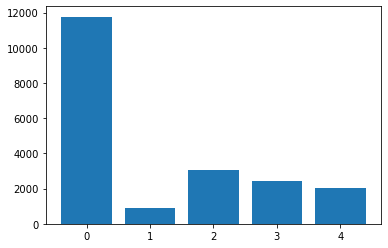

In [95]:
#imbalanced race
plt.bar(counter.keys(), counter.values())
plt.show()

In [96]:
# transform the dataset
oversample = RandomOverSampler()
Xrace, yrace = oversample.fit_resample(Xrace, yrace)
# summarize distribution
counter = Counter(yrace)
for k,v in counter.items():
    per = v / len(yrace) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=11762 (20.000%)
Class=2, n=11762 (20.000%)
Class=1, n=11762 (20.000%)
Class=3, n=11762 (20.000%)
Class=4, n=11762 (20.000%)


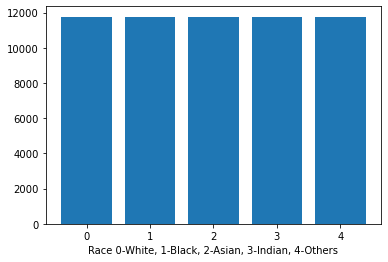

In [97]:
# plot the distribution balanced race
plt.bar(counter.keys(), counter.values())
plt.xlabel('Race 0-White, 1-Black, 2-Asian, 3-Indian, 4-Others')
plt.show()

In [98]:
Xrace.shape

(58810, 3)

In [99]:
race_b_array = np.column_stack( (Xrace, yrace) )

In [100]:
race_b_array

array([['100_1_0_20170110183726390.jpg.chip.jpg', 8, 1, 0],
       ['100_1_2_20170105174847679.jpg.chip.jpg', 8, 1, 2],
       ['101_1_2_20170105174739309.jpg.chip.jpg', 8, 1, 2],
       ...,
       ['31_1_4_20170103230257785.jpg.chip.jpg', 5, 1, 4],
       ['47_0_4_20170104002132109.jpg.chip.jpg', 6, 0, 4],
       ['20_1_4_20170103233322026.jpg.chip.jpg', 4, 1, 4]], dtype=object)

In [101]:
df2 = pd.DataFrame(race_b_array, columns = ['file','age','gender', 'race'])


In [102]:
print(df2)
print(type(df2))

                                         file age gender race
0      100_1_0_20170110183726390.jpg.chip.jpg   8      1    0
1      100_1_2_20170105174847679.jpg.chip.jpg   8      1    2
2      101_1_2_20170105174739309.jpg.chip.jpg   8      1    2
3       10_0_0_20161220222308131.jpg.chip.jpg   3      0    0
4       10_0_0_20170103200329407.jpg.chip.jpg   3      0    0
...                                       ...  ..    ...  ...
58805   27_0_4_20170104011307960.jpg.chip.jpg   5      0    4
58806    8_1_4_20161223232240516.jpg.chip.jpg   2      1    4
58807   31_1_4_20170103230257785.jpg.chip.jpg   5      1    4
58808   47_0_4_20170104002132109.jpg.chip.jpg   6      0    4
58809   20_1_4_20170103233322026.jpg.chip.jpg   4      1    4

[58810 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
